In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk import agreement


In [2]:
def load_and_plot(path: str):
    df = pd.read_csv(path, encoding="latin1")
    df = df.dropna()
    
    tags = df['Tag'].values
    counts_all = df['Tag'].value_counts()
    counts_annotations = df[(df['Tag']!='O')]['Tag'].value_counts()
    
    
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,10))
    
    p1 = counts_all.plot(ax=axes[0], kind='barh')
    p2 = counts_annotations.plot(ax=axes[1], kind='barh')
    
    for p in p1.patches:
        p1.annotate("%d" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()-0.8), xytext=(5, 10), textcoords='offset points')

    
    
    for p in p2.patches:
        p2.annotate("%d" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()-0.8), xytext=(5, 10), textcoords='offset points')
    
    return tags
    

def remove_education(tags:list):
    for i in range(len(tags)):
        if tags[i] == 'B-EDUCATION' or tags[i] == 'I-EDUCATION':
            tags[i] = 'O'
    return tags


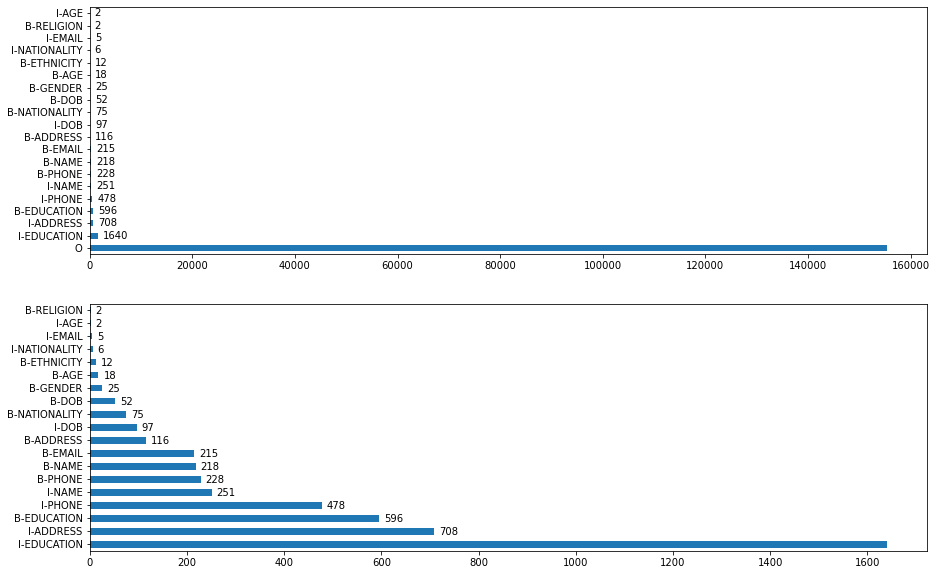

In [4]:
tags_a1 = load_and_plot('./data/annotater_data/annotater_1_v1/csv/1_198.csv')

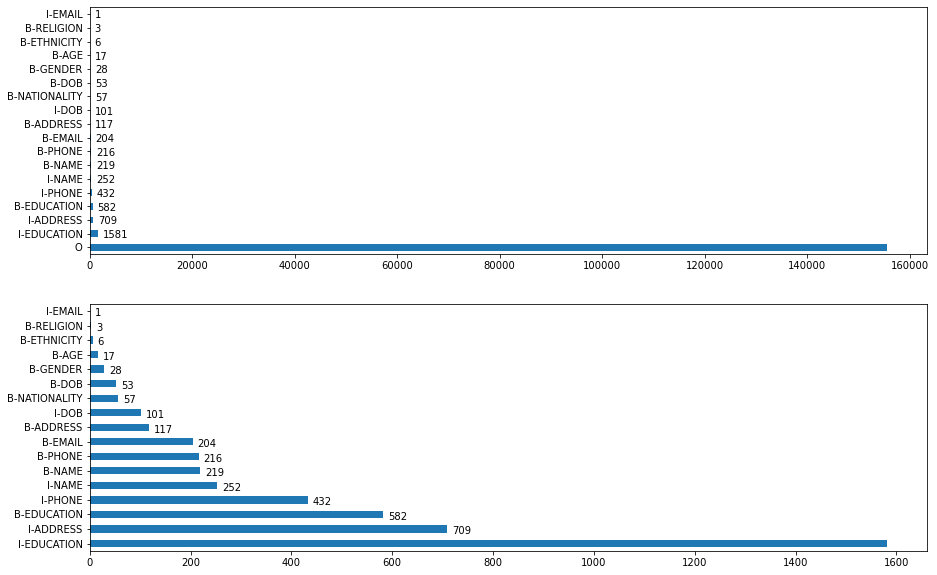

In [5]:
tags_a2 = load_and_plot('./data/annotater_data/annotater_2_v4/csv/1_198.csv')

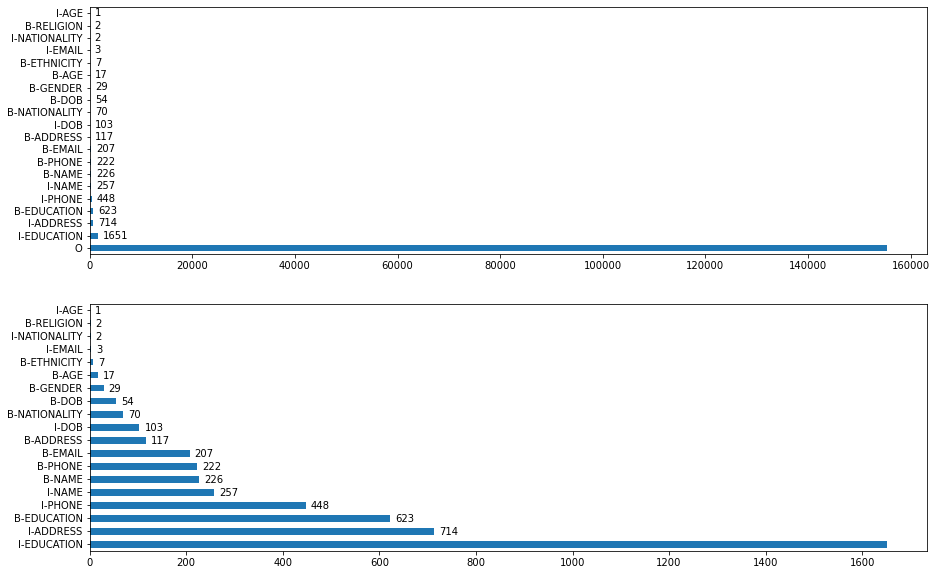

In [6]:
tags_a3 = load_and_plot('./data/annotater_data/annotater_3_v3/csv/1_198.csv')

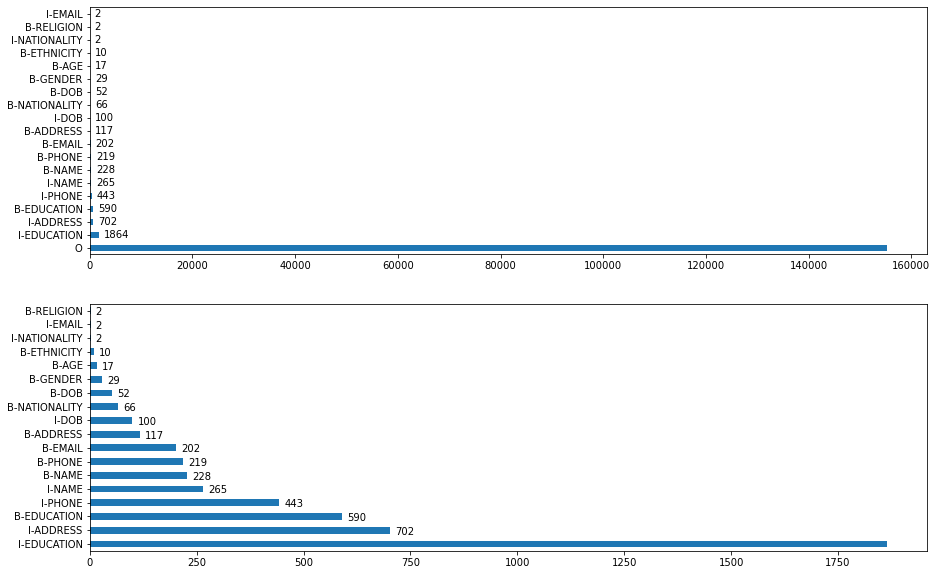

In [7]:
tags_a4 = load_and_plot('./data/annotater_data/annotater_4_v2/csv/1_198.csv')

In [8]:
# load the data
data_a1 = pd.read_csv('./data/annotater_data/annotater_1_v1/csv/1_198.csv', encoding="latin1")
data_a2 = pd.read_csv('./data/annotater_data/annotater_2_v4/csv/1_198.csv', encoding="latin1")
data_a3 = pd.read_csv('./data/annotater_data/annotater_3_v3/csv/1_198.csv', encoding="latin1")
data_a4 = pd.read_csv('./data/annotater_data/annotater_4_v2/csv/1_198.csv', encoding="latin1")

# drop all the rows, which contain NaN values
data_a1 = data_a1.dropna()
data_a2 = data_a2.dropna()
data_a3 = data_a3.dropna()
data_a4 = data_a4.dropna()

In [9]:
a1_tags = data_a1['Tag'].values
a2_tags = data_a2['Tag'].values
a3_tags = data_a3['Tag'].values
a4_tags = data_a4['Tag'].values
                           
                           
                           
set(a1_tags)

{'B-ADDRESS',
 'B-AGE',
 'B-DOB',
 'B-EDUCATION',
 'B-EMAIL',
 'B-ETHNICITY',
 'B-GENDER',
 'B-NAME',
 'B-NATIONALITY',
 'B-PHONE',
 'B-RELIGION',
 'I-ADDRESS',
 'I-AGE',
 'I-DOB',
 'I-EDUCATION',
 'I-EMAIL',
 'I-NAME',
 'I-NATIONALITY',
 'I-PHONE',
 'O'}

In [10]:
data_a2['Tag'].value_counts()

O                155547
I-EDUCATION        1581
I-ADDRESS           709
B-EDUCATION         582
I-PHONE             432
I-NAME              252
B-NAME              219
B-PHONE             216
B-EMAIL             204
B-ADDRESS           117
I-DOB               101
B-NATIONALITY        57
B-DOB                53
B-GENDER             28
B-AGE                17
B-ETHNICITY           6
B-RELIGION            3
I-EMAIL               1
Name: Tag, dtype: int64

In [11]:
data_a3['Tag'].value_counts()

O                155372
I-EDUCATION        1651
I-ADDRESS           714
B-EDUCATION         623
I-PHONE             448
I-NAME              257
B-NAME              226
B-PHONE             222
B-EMAIL             207
B-ADDRESS           117
I-DOB               103
B-NATIONALITY        70
B-DOB                54
B-GENDER             29
B-AGE                17
B-ETHNICITY           7
I-EMAIL               3
I-NATIONALITY         2
B-RELIGION            2
I-AGE                 1
Name: Tag, dtype: int64

In [12]:
data_a4['Tag'].value_counts()

O                155215
I-EDUCATION        1864
I-ADDRESS           702
B-EDUCATION         590
I-PHONE             443
I-NAME              265
B-NAME              228
B-PHONE             219
B-EMAIL             202
B-ADDRESS           117
I-DOB               100
B-NATIONALITY        66
B-DOB                52
B-GENDER             29
B-AGE                17
B-ETHNICITY          10
I-NATIONALITY         2
B-RELIGION            2
I-EMAIL               2
Name: Tag, dtype: int64

In [13]:
t1 = [[0,str(i),str(a1_tags[i])] for i in range(0,len(a1_tags))] 
t2 = [[1,str(i),str(a2_tags[i])] for i in range(0,len(a2_tags))] 
t3 = [[2,str(i),str(a3_tags[i])] for i in range(0,len(a3_tags))] 
t4 = [[3,str(i),str(a4_tags[i])] for i in range(0,len(a4_tags))] 

In [14]:
taskdata = t1 + t2
ratingtask = agreement.AnnotationTask(data=taskdata)

print('A1 and A2')
print("Cohen's Kappa: " +str(ratingtask.kappa()))
print("Fleiss' Multi-Kappa: " + str(ratingtask.multi_kappa()))
print("Krippendorff’s Alpha: " +str(ratingtask.alpha()))
print("Scott's Pi: " + str(ratingtask.pi()))
print("Bennett, Alpert and Goldstein's S: " + str(ratingtask.S()))

A1 and A2
Cohen's Kappa: 0.8728459343049224
Fleiss' Multi-Kappa: 0.8728459343049224
Krippendorff’s Alpha: 0.8728455932995404
Scott's Pi: 0.8728451962509736
Bennett, Alpert and Goldstein's S: 0.9923415095114837


In [15]:
taskdata = t1 + t3
ratingtask = agreement.AnnotationTask(data=taskdata)

print('A1 and A3')
print("Cohen's Kappa: " +str(ratingtask.kappa()))
print("Fleiss' Multi-Kappa: " + str(ratingtask.multi_kappa()))
print("Krippendorff’s Alpha: " +str(ratingtask.alpha()))
print("Scott's Pi: " + str(ratingtask.pi()))
print("Bennett, Alpert and Goldstein's S: " + str(ratingtask.S()))

A1 and A3
Cohen's Kappa: 0.8782546465333407
Fleiss' Multi-Kappa: 0.8782546465333407
Krippendorff’s Alpha: 0.8782549819564963
Scott's Pi: 0.8782546017991252
Bennett, Alpert and Goldstein's S: 0.9925321500472493


In [16]:
taskdata = t1 + t4
ratingtask = agreement.AnnotationTask(data=taskdata)

print('A1 and A4')
print("Cohen's Kappa: " +str(ratingtask.kappa()))
print("Fleiss' Multi-Kappa: " + str(ratingtask.multi_kappa()))
print("Krippendorff’s Alpha: " +str(ratingtask.alpha()))
print("Scott's Pi: " + str(ratingtask.pi()))
print("Bennett, Alpert and Goldstein's S: " + str(ratingtask.S()))

A1 and A4
Cohen's Kappa: 0.8717476713341826
Fleiss' Multi-Kappa: 0.8717476713341826
Krippendorff’s Alpha: 0.8717463882535044
Scott's Pi: 0.871745987772592
Bennett, Alpert and Goldstein's S: 0.9920062451209992


In [17]:
a1 = []
a2 = []
a3 = []
a4 = []

for i in range(len(a1_tags)):
    
    if a1_tags[i] != "O" or a2_tags[i] != "O" or a3_tags[i] != "O" or a4_tags[i] != "O":
        a1.append(a1_tags[i])
        a2.append(a2_tags[i])
        a3.append(a3_tags[i])
        a4.append(a4_tags[i])

In [18]:
t1 = [[0,str(i),str(a1[i])] for i in range(0,len(a1))] 
t2 = [[1,str(i),str(a2[i])] for i in range(0,len(a2))] 
t3 = [[2,str(i),str(a3[i])] for i in range(0,len(a3))] 
t4 = [[3,str(i),str(a4[i])] for i in range(0,len(a4))] 

In [19]:
taskdata = t1 + t2
ratingtask = agreement.AnnotationTask(data=taskdata)

print('A1 and A2')
print("Cohen's Kappa: " +str(ratingtask.kappa()))
print("Fleiss' Multi-Kappa: " + str(ratingtask.multi_kappa()))
print("Krippendorff’s Alpha: " +str(ratingtask.alpha()))
print("Scott's Pi: " + str(ratingtask.pi()))
print("Bennett, Alpert and Goldstein's S: " + str(ratingtask.S()))

A1 and A2
Cohen's Kappa: 0.7590183061352658
Fleiss' Multi-Kappa: 0.7590183061352658
Krippendorff’s Alpha: 0.7589650058285324
Scott's Pi: 0.7589438790869976
Bennett, Alpert and Goldstein's S: 0.7850454356750772


In [20]:
taskdata = t1 + t3
ratingtask = agreement.AnnotationTask(data=taskdata)

print('A1 and A3')
print("Cohen's Kappa: " +str(ratingtask.kappa()))
print("Fleiss' Multi-Kappa: " + str(ratingtask.multi_kappa()))
print("Krippendorff’s Alpha: " +str(ratingtask.alpha()))
print("Scott's Pi: " + str(ratingtask.pi()))
print("Bennett, Alpert and Goldstein's S: " + str(ratingtask.S()))

A1 and A3
Cohen's Kappa: 0.76511643786267
Fleiss' Multi-Kappa: 0.76511643786267
Krippendorff’s Alpha: 0.7651323504281327
Scott's Pi: 0.7651117642549735
Bennett, Alpert and Goldstein's S: 0.7903962359887449


In [21]:
taskdata = t1 + t4
ratingtask = agreement.AnnotationTask(data=taskdata)

print('A1 and A4')
print("Cohen's Kappa: " +str(ratingtask.kappa()))
print("Fleiss' Multi-Kappa: " + str(ratingtask.multi_kappa()))
print("Krippendorff’s Alpha: " +str(ratingtask.alpha()))
print("Scott's Pi: " + str(ratingtask.pi()))
print("Bennett, Alpert and Goldstein's S: " + str(ratingtask.S()))

A1 and A4
Cohen's Kappa: 0.7470359513150099
Fleiss' Multi-Kappa: 0.7470359513150099
Krippendorff’s Alpha: 0.7468741751902557
Scott's Pi: 0.7468519886861966
Bennett, Alpert and Goldstein's S: 0.775635407537248


In [22]:
taskdata = t2 + t3
ratingtask = agreement.AnnotationTask(data=taskdata)

print('A2 and A3')
print("Cohen's Kappa: " +str(ratingtask.kappa()))
print("Fleiss' Multi-Kappa: " + str(ratingtask.multi_kappa()))
print("Krippendorff’s Alpha: " +str(ratingtask.alpha()))
print("Scott's Pi: " + str(ratingtask.pi()))
print("Bennett, Alpert and Goldstein's S: " + str(ratingtask.S()))

A2 and A3
Cohen's Kappa: 0.8139382001993254
Fleiss' Multi-Kappa: 0.8139382001993254
Krippendorff’s Alpha: 0.8138907175176262
Scott's Pi: 0.8138744050202573
Bennett, Alpert and Goldstein's S: 0.8341251902763043


In [23]:
taskdata = t2 + t4
ratingtask = agreement.AnnotationTask(data=taskdata)

print('A2 and A4')
print("Cohen's Kappa: " +str(ratingtask.kappa()))
print("Fleiss' Multi-Kappa: " + str(ratingtask.multi_kappa()))
print("Krippendorff’s Alpha: " +str(ratingtask.alpha()))
print("Scott's Pi: " + str(ratingtask.pi()))
print("Bennett, Alpert and Goldstein's S: " + str(ratingtask.S()))

A2 and A4
Cohen's Kappa: 0.782903543814372
Fleiss' Multi-Kappa: 0.782903543814372
Krippendorff’s Alpha: 0.7825442589492534
Scott's Pi: 0.7825251989316313
Bennett, Alpert and Goldstein's S: 0.8068361086765994


In [24]:
taskdata = t3 + t4
ratingtask = agreement.AnnotationTask(data=taskdata)

print('A3 and A4')
print("Cohen's Kappa: " +str(ratingtask.kappa()))
print("Fleiss' Multi-Kappa: " + str(ratingtask.multi_kappa()))
print("Krippendorff’s Alpha: " +str(ratingtask.alpha()))
print("Scott's Pi: " + str(ratingtask.pi()))
print("Bennett, Alpert and Goldstein's S: " + str(ratingtask.S()))

A3 and A4
Cohen's Kappa: 0.8043007560952886
Fleiss' Multi-Kappa: 0.8043007560952886
Krippendorff’s Alpha: 0.8041903262156235
Scott's Pi: 0.8041731634779792
Bennett, Alpert and Goldstein's S: 0.8265602656949121


In [25]:
taskdata = t2 + t3 + t4
ratingtask = agreement.AnnotationTask(data=taskdata)

print('A2 and A3, A4')
print("Cohen's Kappa: " +str(ratingtask.kappa()))
print("Fleiss' Multi-Kappa: " + str(ratingtask.multi_kappa()))
print("Krippendorff’s Alpha: " +str(ratingtask.alpha()))
print("Scott's Pi: " + str(ratingtask.pi()))
print("Bennett, Alpert and Goldstein's S: " + str(ratingtask.S()))

A2 and A3, A4
Cohen's Kappa: 0.8003808333696619
Fleiss' Multi-Kappa: 0.8004007103022011
Krippendorff’s Alpha: 0.800291143022328
Scott's Pi: 0.8002794736956377
Bennett, Alpert and Goldstein's S: 0.8226855482263942


In [26]:
from collections import Counter

In [27]:
def vote(votes: list):
    return max(votes,key=votes.count)


In [28]:
final = []
for i in range(len(a1_tags)):
    tag = vote([a2_tags[i], a3_tags[i], a4_tags[i]])
    final.append(tag)

In [29]:
print(len(final))

160125


In [30]:
print(len(a1_tags))

160125


In [31]:
words = list(data_a1['Word'].values)

In [32]:
file_ids = list(data_a1['File_id'].values)

In [33]:
d = {
    'File_id': file_ids,
    'Word': words,
    'Tag': final
}

In [34]:
df = pd.DataFrame(d)

In [ ]:
df.to_csv(r'data/dataset.csv', index = False)
